In [1]:
#Importing libraries
import pandas as pd
pd.set_option('display.max_columns',None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")


In [2]:
#read dataset
df_lead=pd.read_csv('S:\\PGD\\Practice_assignment\\Lead Scoring Assignment\\Leads.csv')
df_lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Check dimensions
df_lead.shape

(9240, 37)

In [4]:
df_lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
#check datatypes 
df_lead.info()
#We can see a lotof columns have missing values as they are having less than 9240 values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
#Check percentage of missing values in each column
100*(df_lead.isnull().sum()/df_lead.shape[0])


Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

### None of the columns are having null values which are much more than 50%, hence we cannot directly drop columns. will check why the values are missing and try to populate.

In [7]:
#Check distribution of target variable
df_lead.Converted.value_counts(normalize=True)
# SHows 38% conversion rate

0    0.61461
1    0.38539
Name: Converted, dtype: float64

In [8]:
df_lead.loc[:,df_lead.dtypes==object].columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [9]:
# Check levels of categorical variables
Cat_Var=list(df_lead.loc[:,df_lead.dtypes==object].columns)
del Cat_Var[0]# removing Prospect ID from list

for a in Cat_Var:
    print('Var ********* ',a,'******** : ','\n',df_lead[a].value_counts())
 

Var *********  Lead Origin ******** :  
 Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Var *********  Lead Source ******** :  
 Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
youtubechannel          1
Pay per Click Ads       1
WeLearn                 1
blog                    1
welearnblog_Home        1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64
Var *********  Do Not Email ******** :  
 No     8506
Yes     734
Name: Do Not Email, dtype: int64
Var *********  Do Not Call ******** :  
 No     9

Name: City, dtype: int64
Var *********  Asymmetrique Activity Index ******** :  
 02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64
Var *********  Asymmetrique Profile Index ******** :  
 02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64
Var *********  I agree to pay the amount through cheque ******** :  
 No    9240
Name: I agree to pay the amount through cheque, dtype: int64
Var *********  A free copy of Mastering The Interview ******** :  
 No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64
Var *********  Last Notable Activity ******** :  
 Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable        

 ## Categorical columns value check
Lead Origin looks fine.

Lead SOurce : looks fine, categores having less than 10 values can be clubbed under new 'Others' category

Do Not Email: looks fine

Do Not Call: only two values have Yes, hence can be dropped

Last Activity: Looks fine, categores having less than 10 values can be clubbed under new 'Others' category

COuntry: Looks fine

Specialization: Looks fine 

How did you hear about X Education:looks fine

What is your current occupation: Looks fine

What matters most to you in choosing a course: alot of values missing, and "Better Career Prospects" most of values are under this category, hence does not gives much information

Magazine, Newspaper Article,Education Forums, Newspaper, Digital Advertisement, Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque have very more than 98% values as "NO", hence these columns can be directly removed as they dont provide much information.

Tags: Looks fine, though dropping as this information is something we will not have as part of input. This is data after Lead is contacted

Lead Quality: Looks fine

Lead Profile: Looks fine, category "Select" means values are missing hence can be taken as null values, and again the percentage of null values can be checked.

City: Looks fine,category "Select" means values are missing hence can be taken as null values, and again the percentage of null values can be checked.

Asymmetrique Activity Index|Score/Asymmetrique Profile Index|Score: Looks fine, will drop as it is assigned after Lead is contacted, hence it will not be part of input data 

Last Notable Activity: Looks fine, maybe duplicate column same as Last Activity and most of the values are 'Modified' which does not gives a lot of information.

In [10]:
# Dropping Columns which are having majority of values under a single category
df_lead.drop(columns=['Magazine', 'Newspaper Article','X Education Forums', 'Newspaper', 'Digital Advertisement',
                      'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
                      'Get updates on DM Content','I agree to pay the amount through cheque','Do Not Call',
                      'What matters most to you in choosing a course','Tags','Asymmetrique Activity Index',
                      'Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score','Last Notable Activity','Search','Lead Quality'], inplace=True)

In [11]:
df_lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,Lead Profile,City,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Select,Select,No
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Select,Select,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Potential Lead,Mumbai,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Select,Mumbai,No
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Select,Mumbai,No


In [12]:
df_lead.shape

(9240, 17)

In [13]:
#Replace fields having 'Select' values with NA 
df_lead[['Specialization','How did you hear about X Education','Lead Profile','City']]=df_lead[['Specialization','How did you hear about X Education','Lead Profile','City']].replace('Select',np.NaN)

In [14]:
# Dropping 'Lead Profile' and 'How did you hear about X Education' as after replacing Select with NAN they have 70% values NAN

df_lead.drop(columns=['Lead Profile', 'How did you hear about X Education'], inplace=True)

### Handling missing values in  variables

In [15]:
#Handle Country, if the City variable is not null and having value'Thane & Outskirts','Other Cities of Maharashtra','Mumbai'
# Then put value column Country as India
City=['Thane & Outskirts','Other Cities of Maharashtra','Mumbai']
df_lead['Country']=df_lead.apply(lambda x: 'India' if pd.isnull(x['Country']) & (x['City'] in City) else x['Country'],axis=1)

#Missing Country values drop to 23% which is some improvment.Will replace rest of values with 'unknown', and see importance
# of variable to see if we should keep as part of model or not

In [16]:
#Dropping 'City' as almost 40% values are null and other values dont give alot of information having values like Other cities/ Tier 2 cities etc
df_lead.drop(columns=['City'], inplace=True)
df_lead['Country'].fillna('unknown',inplace=True)

In [17]:
df_lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,unknown,NaN,Unemployed,No
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,No
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,No


In [18]:
df_lead[df_lead['Specialization'].isnull()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,unknown,NaN,Unemployed,No
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,No
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,No
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,0,0.0,0,0.0,Olark Chat Conversation,unknown,NaN,NaN,No
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,0,0.0,0,0.0,Olark Chat Conversation,unknown,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9208,24e50c78-3bf5-4582-bb9f-abff3b2f0dc1,579851,API,Google,No,0,2.0,181,2.0,SMS Sent,India,NaN,NaN,No
9214,479a8b1c-d410-4220-a24f-854a376be43d,579808,API,Organic Search,No,1,2.0,881,2.0,SMS Sent,India,NaN,NaN,No
9217,b8872c12-7534-498d-8f4a-e79a19516db1,579786,API,Olark Chat,No,0,0.0,0,0.0,SMS Sent,unknown,NaN,Unemployed,No
9226,c3bb1471-53d5-4244-b2e5-4bbb543835c1,579735,API,Olark Chat,No,0,0.0,0,0.0,SMS Sent,unknown,NaN,Unemployed,No


In [19]:
#Handling countries , MArking records having countries with less than 10 values as 'Others'

L1=['Hong Kong','Bahrain','Oman','France','unknown','Canada','Nigeria',
 'Kuwait','Germany','South Africa','Sweden','Netherlands','China','Bangladesh',
  'Uganda','Philippines','Asia/Pacific Region','Italy','Belgium','Ghana','Kenya','Tanzania',
 'Malaysia','Sri Lanka','Indonesia','Denmark','Vietnam','Russia','Liberia','Switzerland']
df_lead['Country']=df_lead['Country'].apply(lambda x : 'Others' if (x in L1) else x)

In [20]:
df_lead[df_lead['What is your current occupation']=='Unemployed'].shape

(5600, 14)

In [21]:
#Handle Total Visit and Page view per visit
df_lead[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']].describe()



,TotalVisits,Page Views Per Visit,Total Time Spent on Website
count,9103.000000,9103.000000,9240.000000
mean,3.445238,2.362820,487.698268
std,4.854853,2.161418,548.021466
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,12.000000
50%,3.000000,2.000000,248.000000
75%,5.000000,3.000000,936.000000
max,251.000000,55.000000,2272.000000


TotalVisits: We can see that the mean is slightly more than median and hence the distiribution looks slightly left skewed
Page Views Per Visit: We can see that the mean is slightly more than median and hence the distiribution looks slightly left skewed
Time Spent on Website: We can see that the mean is almost double than median and hence the distiribution looks left skewed

In [22]:
df_lead['TotalVisits'].describe()


count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [23]:
#CHeck quantile distribution
df_lead['TotalVisits'].quantile([0.25,0.5,0.75,0.9,0.95,0.99,1])


0.25      1.0
0.50      3.0
0.75      5.0
0.90      7.0
0.95     10.0
0.99     17.0
1.00    251.0
Name: TotalVisits, dtype: float64

In [24]:
# For missing value imputation,we can populate median value as the percentage of such record is less (1.48%)
df_lead['TotalVisits'].fillna(df_lead['TotalVisits'].median(),inplace=True)
df_lead['Page Views Per Visit'].fillna(df_lead['Page Views Per Visit'].median(),inplace=True)

In [25]:
# Handling null value in Lead Source
df_lead['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
youtubechannel          1
Pay per Click Ads       1
WeLearn                 1
blog                    1
welearnblog_Home        1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [26]:
# Converting 'google' to 'Google',
#Clubbing values having count less than 10 into Others category, as they will not give much information
df_lead['Lead Source']=df_lead['Lead Source'].apply(lambda x: 'Google' if x=='google' else x)
L1=['bing','Click2call','Social Media','Live Chat','Press_Release','blog','NC_EDM','testone','Pay per Click Ads',
   'welearnblog_Home','youtubechannel','WeLearn']
df_lead['Lead Source']=df_lead['Lead Source'].apply(lambda x: 'Others' if x in L1 else x)


In [27]:
df_lead['Lead Source'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Others                23
Name: Lead Source, dtype: int64

In [28]:
df_lead[df_lead['Lead Source'].isnull()]
# We can observe most of the Lead Origin are 'Lead Add Form', for the null values for Lead Source. Hence we can take mode of
# Lead Source where Lead Origin='Lead Add Form'. ALso the percentage of missing values is very less 0.38%

val1=df_lead[df_lead['Lead Origin']=='Lead Add Form']['Lead Source'].mode()
#val1
df_lead['Lead Source'].fillna('Reference',inplace=True)


In [29]:
#Last Activity : Dropping column, as this is done post contacting leads, which will not be part of the data recieved.
df_lead.drop(columns=['Last Activity'],inplace=True)


In [30]:
# Fill Null values of Specialization and Current Occupation with "Unknown", as they cannot be derived/guessed
df_lead['Specialization'].fillna('Unknown',inplace=True)
df_lead['What is your current occupation'].fillna('Unknown',inplace=True)

In [31]:
#Renaming Columns
df_lead.rename(columns={'Prospect ID':'Prospect_ID',
                       'Lead Number':'Lead_Number',
                       'Lead Origin':'Lead_Origin',
                       'Lead Source':'Lead_Source',
                       'Do Not Email':'Do_Not_Email',
                       'Total Time Spent on Website':'Time_Spent_On_Website',
                       'Page Views Per Visit':'Page_Views_Per_Visit',
                       'What is your current occupation':'Current_Occupation',
                       'A free copy of Mastering The Interview':'Free_Copy_Of_Book'},inplace=True)

# Removing Outliers Continuous Variables

In [32]:
#Rounding off Page View per Visit as it should be an integer
df_lead['Page_Views_Per_Visit']=round(df_lead['Page_Views_Per_Visit'],0)

In [33]:
df_lead[['TotalVisits','Page_Views_Per_Visit','Time_Spent_On_Website']].describe()
# Taking Interquartile range Approach to define lower and upper limits as Q1-(Q3-Q1)*1.5,Q3+(Q3-Q1)*1.5

,TotalVisits,Page_Views_Per_Visit,Time_Spent_On_Website
count,9240.000000,9240.000000,9240.000000
mean,3.438636,2.362338,487.698268
std,4.819024,2.145253,548.021466
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,12.000000
50%,3.000000,2.000000,248.000000
75%,5.000000,3.000000,936.000000
max,251.000000,55.000000,2272.000000


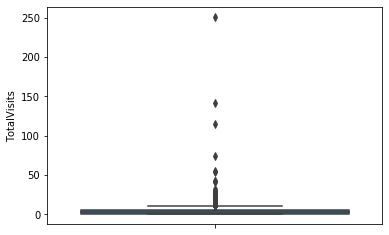

In [34]:
sns.boxplot(df_lead['TotalVisits'],orient='v')

## We can see that the we have certain values which are very high (), hence it would be better to drop such records

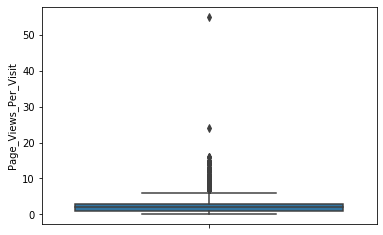

In [35]:
sns.boxplot(df_lead['Page_Views_Per_Visit'],orient='v')

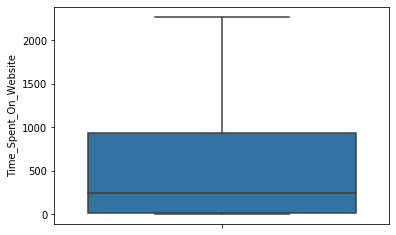

In [36]:
sns.boxplot(df_lead['Time_Spent_On_Website'],orient='v')

In [37]:
# Calculate upper limit for removing outliers in Total Visits, Page view per visit
Visit_Upper=5+(5-1)*1.5
Page_View_Upper=3+(3-1)*1.5

print(Visit_Upper,Page_View_Upper)

11.0 6.0


In [38]:
df_clean=df_lead[(df_lead['TotalVisits']<=11) & (df_lead['Page_Views_Per_Visit']<=6)]
df_clean.shape

(8679, 13)

In [39]:
df_clean.head()

,Prospect_ID,Lead_Number,Lead_Origin,Lead_Source,Do_Not_Email,Converted,TotalVisits,Time_Spent_On_Website,Page_Views_Per_Visit,Country,Specialization,Current_Occupation,Free_Copy_Of_Book
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Others,Unknown,Unemployed,No
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.0,India,Unknown,Unemployed,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,India,Business Administration,Student,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,India,Media and Advertising,Unemployed,No
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,India,Unknown,Unemployed,No


In [40]:
df_clean.Converted.value_counts(normalize=True) 

0    0.616085
1    0.383915
Name: Converted, dtype: float64

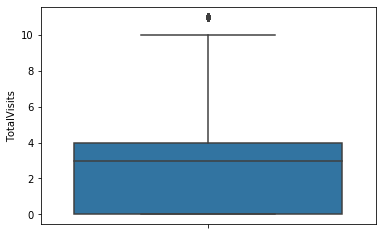

In [41]:
sns.boxplot(df_clean['TotalVisits'],orient='v')
# No more outliers

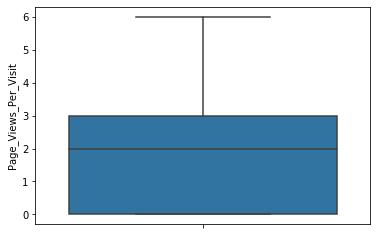

In [42]:
sns.boxplot(df_clean['Page_Views_Per_Visit'],orient='v')
## No more outliers

# Exploratory Data Analysis

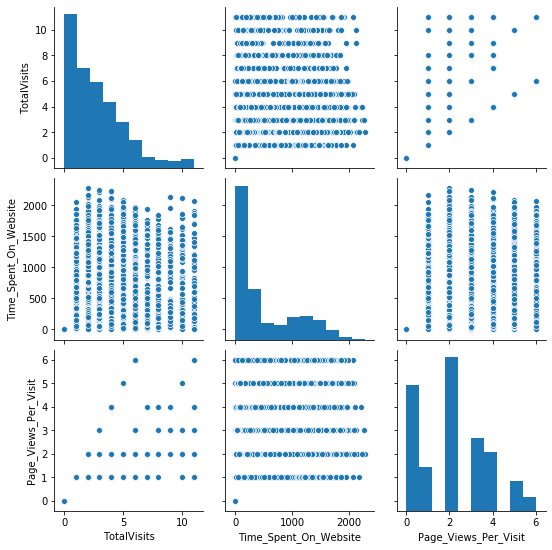

In [43]:
#create pairplots for continuous variables
num_var=['TotalVisits','Time_Spent_On_Website','Page_Views_Per_Visit']
sns.pairplot(df_clean[num_var])

# we dont see any significant pattern among the continuous variables. The distributions are also not normal.

In [44]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8679 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Prospect_ID            8679 non-null   object 
 1   Lead_Number            8679 non-null   int64  
 2   Lead_Origin            8679 non-null   object 
 3   Lead_Source            8679 non-null   object 
 4   Do_Not_Email           8679 non-null   object 
 5   Converted              8679 non-null   int64  
 6   TotalVisits            8679 non-null   float64
 7   Time_Spent_On_Website  8679 non-null   int64  
 8   Page_Views_Per_Visit   8679 non-null   float64
 9   Country                8679 non-null   object 
 10  Specialization         8679 non-null   object 
 11  Current_Occupation     8679 non-null   object 
 12  Free_Copy_Of_Book      8679 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 1.2+ MB


[Text(0, 0, 'No'), Text(0, 0, 'Yes')]

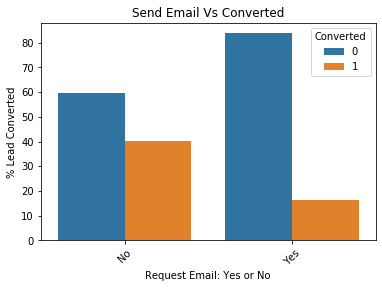

In [45]:
email_fig=df_clean.groupby(["Do_Not_Email", "Converted"]).agg({"Lead_Number" : "count"}).groupby(level=0).apply(lambda x: 100*x/x.sum())
email_fig.reset_index(inplace=True)
ay=sns.barplot(data=email_fig,x='Do_Not_Email',y='Lead_Number',hue='Converted')
ay.set(xlabel='Request Email: Yes or No', ylabel='% Lead Converted',title='Send Email Vs Converted')
ay.set_xticklabels(ay.get_xticklabels(), rotation=45)
#People who want to be contacted by email have a much higher conversion rate than people who do not want to be contacted

In [46]:
df_clean.groupby(["Specialization", "Converted"]).agg({"Lead_Number" : "count"}).groupby(level=0).apply(lambda x: 100*x/x.sum())
#Though not much difference, "Banking, Investment And Insurance","Healthcare Management","Marketing Management" are groups to be targetted
# "Travel and Tourism" , "Services Excellence" are less likely to convert

Lead_Number
Specialization                    Converted             
Banking, Investment And Insurance 0            50.337838
                                  1            49.662162
Business Administration           0            55.795148
                                  1            44.204852
E-Business                        0            63.461538
                                  1            36.538462
E-COMMERCE                        0            64.285714
                                  1            35.714286
Finance Management                0            55.240175
                                  1            44.759825
Healthcare Management             0            50.359712
                                  1            49.640288
Hospitality Management            0            56.603774
                                  1            43.396226
Human Resource Management         0            53.717949
                                  1            46.282051
IT Projects Management            0            60.176991
                                  1            39.823009
International Business            0            63.414634
                                  1            36.585366
Marketing Management              0            50.950570
                                  1            49.049430
Media and Advertising             0            59.239130
                                  1            40.760870
Operations Management             0            53.039832
                                  1            46.960168
Retail Management                 0            63.636364
                                  1            36.363636
Rural and Agribusiness            0            59.677419
                                  1            40.322581
Services Excellence               0            72.222222
                                  1            27.777778
Supply Chain Management           0            58.044164
                                  1            41.955836
Travel and Tourism                0            65.662651
                                  1            34.337349
Unknown                           0            71.415580
                                  1            28.584420

[Text(0, 0, 'Banking, Investment And Insurance'),
 Text(0, 0, 'Healthcare Management'),
 Text(0, 0, 'Marketing Management'),
 Text(0, 0, 'Services Excellence'),
 Text(0, 0, 'Travel and Tourism')]

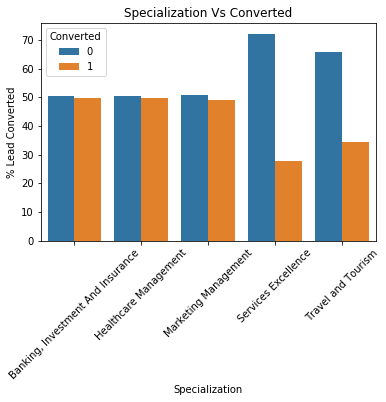

In [47]:
var1=['Banking, Investment And Insurance','Healthcare Management','Marketing Management','Travel and Tourism' , 'Services Excellence']
temp=df_clean[(df_clean["Specialization"].isin(var1))]

spec_fig=temp.groupby(["Specialization", "Converted"]).agg({"Lead_Number" : "count"}).groupby(level=0).apply(lambda x: 100*x/x.sum())
spec_fig.reset_index(inplace=True)
ay=sns.barplot(data=spec_fig,x='Specialization',y='Lead_Number',hue='Converted')
ay.set(xlabel='Specialization', ylabel='% Lead Converted',title='Specialization Vs Converted')
ay.set_xticklabels(ay.get_xticklabels(), rotation=45)


[Text(0, 0, 'Businessman'),
 Text(0, 0, 'Housewife'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Student'),
 Text(0, 0, 'Unemployed'),
 Text(0, 0, 'Unknown'),
 Text(0, 0, 'Working Professional')]

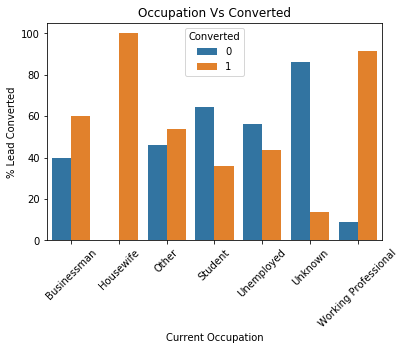

In [48]:
occup_fig=df_clean.groupby(["Current_Occupation", "Converted"]).agg({"Lead_Number" : "count"}).groupby(level=0).apply(lambda x: 100*x/x.sum())
occup_fig.reset_index(inplace=True)
ay=sns.barplot(data=occup_fig,x='Current_Occupation',y='Lead_Number',hue='Converted')
ay.set(xlabel='Current Occupation', ylabel='% Lead Converted',title='Occupation Vs Converted')
ay.set_xticklabels(ay.get_xticklabels(), rotation=45)

# "Working Professional"/Housewives are most likely to get converted, whereas Student are not likely to get converted 

In [49]:
df_clean.groupby(["Free_Copy_Of_Book", "Converted"]).agg({"Lead_Number" : "count"}).groupby(level=0).apply(lambda x: 100*x/x.sum())

Lead_Number
Free_Copy_Of_Book Converted             
No                0            60.304469
                  1            39.695531
Yes               0            64.708171
                  1            35.291829

[Text(0, 0, 'API'),
 Text(0, 0, 'Landing Page Submission'),
 Text(0, 0, 'Lead Add Form'),
 Text(0, 0, 'Lead Import'),
 Text(0, 0, 'Quick Add Form')]

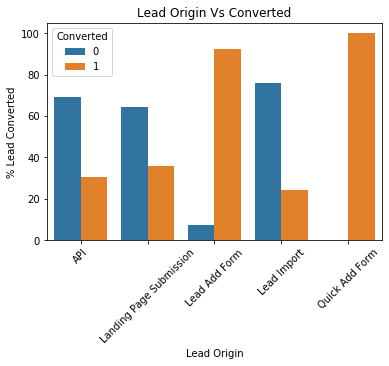

In [50]:
origin_fig=df_clean.groupby(["Lead_Origin", "Converted"]).agg({"Lead_Number" : "count"}).groupby(level=0).apply(lambda x: 100*x/x.sum())
origin_fig.reset_index(inplace=True)
ay=sns.barplot(data=origin_fig,x='Lead_Origin',y='Lead_Number',hue='Converted')
ay.set(xlabel='Lead Origin', ylabel='% Lead Converted',title='Lead Origin Vs Converted')
ay.set_xticklabels(ay.get_xticklabels(), rotation=45)

# 'Lead Add Form' has a very high conversion rate ,compared to other origin types. Quick add form has only 1 value so cannot conclude

[Text(0, 0, 'Direct Traffic'),
 Text(0, 0, 'Facebook'),
 Text(0, 0, 'Google'),
 Text(0, 0, 'Olark Chat'),
 Text(0, 0, 'Organic Search'),
 Text(0, 0, 'Others'),
 Text(0, 0, 'Reference'),
 Text(0, 0, 'Referral Sites'),
 Text(0, 0, 'Welingak Website')]

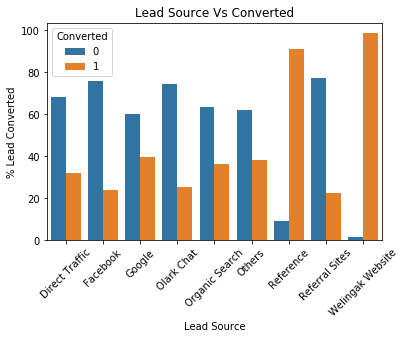

In [51]:
source_fig=df_clean.groupby(["Lead_Source", "Converted"]).agg({"Lead_Number" : "count"}).groupby(level=0).apply(lambda x: 100*x/x.sum())
source_fig.reset_index(inplace=True)
ay=sns.barplot(data=source_fig,x='Lead_Source',y='Lead_Number',hue='Converted')
ay.set(xlabel='Lead Source', ylabel='% Lead Converted',title='Lead Source Vs Converted')
ay.set_xticklabels(ay.get_xticklabels(), rotation=45)

# 'Reference', 'Welingak Website' are showing a relatively higher rate of conversion. 'Facebook', 'Olark Chat' sources are less likely.

In [52]:
df_clean.groupby('Converted').median()
# 'Time_Spent_On_Website' having much higher values shows a much higher Lead Converted (Assuming time is in seconds)

,Lead_Number,TotalVisits,Time_Spent_On_Website,Page_Views_Per_Visit
Converted,,,,
0,614251.0,2.0,173.0,2.0
1,617155.5,3.0,800.0,2.0


In [53]:
#Creating dummy categorical variables
df=pd.concat([df_clean,pd.get_dummies(df_clean['Lead_Origin'],prefix='Lead_Origin',drop_first=True),
              pd.get_dummies(df_clean['Lead_Source'],prefix='Lead_Source',drop_first=True),
              pd.get_dummies(df_clean['Do_Not_Email'],prefix='Do_Not_Email',drop_first=True),
              pd.get_dummies(df_clean['Country'],prefix='Country',drop_first=True),
              pd.get_dummies(df_clean['Specialization'],prefix='Specialization',drop_first=True),
              pd.get_dummies(df_clean['Current_Occupation'],prefix='Current_Occupation',drop_first=True),
              pd.get_dummies(df_clean['Free_Copy_Of_Book'],prefix='Free_Copy_Of_Book',drop_first=True),],axis=1).drop(['Lead_Origin','Lead_Source','Do_Not_Email','Country'
                                                                                            ,'Specialization','Current_Occupation'
                                                                                            ,'Free_Copy_Of_Book'],axis=1)

In [54]:
df.head()
#print(df.shape)


,Prospect_ID,Lead_Number,Converted,TotalVisits,Time_Spent_On_Website,Page_Views_Per_Visit,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Origin_Quick Add Form,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Others,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Do_Not_Email_Yes,Country_India,Country_Others,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,Current_Occupation_Housewife,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Unknown,Current_Occupation_Working Professional,Free_Copy_Of_Book_Yes
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


# Modelling

In [55]:
X=df.drop(columns=['Prospect_ID', 'Lead_Number','Converted'])
Y=df['Converted']
X.head()

,TotalVisits,Time_Spent_On_Website,Page_Views_Per_Visit,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Origin_Quick Add Form,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Others,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Do_Not_Email_Yes,Country_India,Country_Others,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,Current_Occupation_Housewife,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Unknown,Current_Occupation_Working Professional,Free_Copy_Of_Book_Yes
0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,5.0,674,2.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [56]:
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [57]:
# Train and Test Split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.7,test_size=0.3,random_state=100)

In [58]:
#print(Y_train.Converted.value_counts(normalize=True))
#print(Y_test.Converted.value_counts(normalize=True))
print(pd.DataFrame(Y_train)['Converted'].value_counts())
print(pd.DataFrame(Y_test)['Converted'].value_counts())

0    3756
1    2319
Name: Converted, dtype: int64
0    1591
1    1013
Name: Converted, dtype: int64


In [59]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6075, 49)
(2604, 49)
(6075,)
(2604,)


In [60]:
X_train.columns

Index(['TotalVisits', 'Time_Spent_On_Website', 'Page_Views_Per_Visit',
       'Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Add Form',
       'Lead_Origin_Lead Import', 'Lead_Origin_Quick Add Form',
       'Lead_Source_Facebook', 'Lead_Source_Google', 'Lead_Source_Olark Chat',
       'Lead_Source_Organic Search', 'Lead_Source_Others',
       'Lead_Source_Reference', 'Lead_Source_Referral Sites',
       'Lead_Source_Welingak Website', 'Do_Not_Email_Yes', 'Country_India',
       'Country_Others', 'Country_Qatar', 'Country_Saudi Arabia',
       'Country_Singapore', 'Country_United Arab Emirates',
       'Country_United Kingdom', 'Country_United States',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Project

In [61]:
Y_train.head()

5182    0
8469    0
8382    0
8031    0
6712    1
Name: Converted, dtype: int64

In [62]:
# Scaling Training data set
scaler=MinMaxScaler()
# Variables to scale
var1=['TotalVisits', 'Time_Spent_On_Website', 'Page_Views_Per_Visit']
X_train[var1]=scaler.fit_transform(X_train[var1])
X_train.head()

,TotalVisits,Time_Spent_On_Website,Page_Views_Per_Visit,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Origin_Quick Add Form,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Others,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Do_Not_Email_Yes,Country_India,Country_Others,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,Current_Occupation_Housewife,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Unknown,Current_Occupation_Working Professional,Free_Copy_Of_Book_Yes
5182,0.090909,0.024412,0.166667,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
8469,0.181818,0.082113,0.333333,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
8382,0.272727,0.619174,0.333333,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
8031,0.272727,0.191300,0.500000,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
6712,0.272727,0.923657,0.333333,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


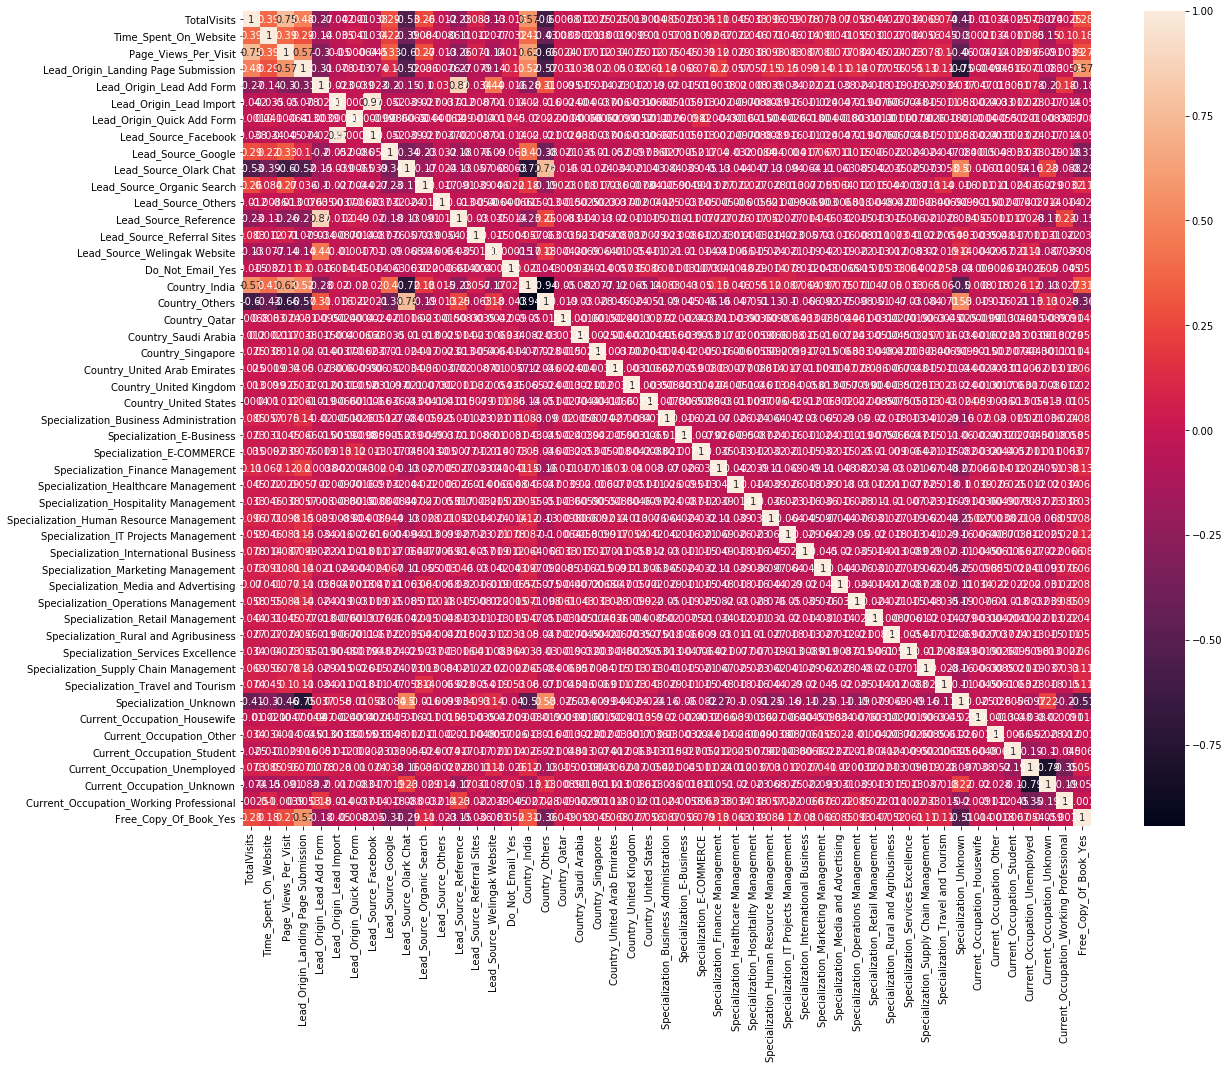

In [63]:
#See correlation
plt.figure(figsize=(19,15))
sns.heatmap(X_train.corr(),annot=True)
plt.show()



In [64]:
#Build first model 
logm1 = sm.GLM(Y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6025
Model Family:                Binomial   Df Model:                           49
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2631.7
Date:                Sat, 17 Jul 2021   Deviance:                       5263.4
Time:                        23:29:06   Pearson chi2:                 6.85e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.2529      1.465     -1.538      0.124      -5.125       0.619
TotalVisits                                  0.8479      0.236      3.599      0.000       0.386       1.310
Time_Spent_On_Website                        4.3521      0.168     25.974      0.000       4.024       4.681
Page_Views_Per_Visit                        -0.4160      0.215     -1.931      0.053      -0.838       0.006
Lead_Origin_Landing Page Submission         -0.6433      0.141     -4.573      0.000      -0.919      -0.368
Lead_Origin_Lead Add Form                    1.7091      1.113      1.535      0.125      -0.473       3.891
Lead_Origin_Lead Import                     -1.1651      1.959     -0.595      0.552      -5.004       2.674
Lead_Origin_Quick Add Form                  18.5818   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead_Source_Facebook                         1.3308      1.954      0.681      0.496      -2.499       5.161
Lead_Source_Google                           0.2360      0.117      2.019      0.044       0.007       0.465
Lead_Source_Olark Chat                       1.3093      0.228      5.754      0.000       0.863       1.755
Lead_Source_Organic Search                   0.2650      0.136      1.954      0.051      -0.001       0.531
Lead_Source_Others                           0.3536      0.793      0.446      0.656      -1.200       1.907
Lead_Source_Reference                        2.0370      1.115      1.827      0.068      -0.148       4.222
Lead_Source_Referral Sites                  -0.3145      0.358     -0.879      0.379      -1.015       0.386
Lead_Source_Welingak Website                 5.2625      1.502      3.504      0.000       2.319       8.206
Do_Not_Email_Yes                            -1.2811      0.172     -7.446      0.000      -1.618      -0.944
Country_India                                0.5212      0.816      0.639      0.523      -1.078       2.120
Country_Others                               0.3269      0.838      0.390      0.696      -1.315       1.969
Country_Qatar                              -22.1111   1.66e+04     -0.001      0.999   -3.25e+04    3.24e+04
Country_Saudi Arabia                        -0.0121      1.122     -0.011      0.991      -2.211       2.187
Country_Singapore                            1.1272      1.040      1.084      0.278      -0.911       3.165
Country_United Arab Emirates                 0.7513      0.917      0.819      0.413      -1.046       2.549
Country_United Kingdom                       0.7184      1.129      0.636      0.525      -1.495       2.932
Country_United States                        0.4081      0.931      0.438      0.661      -1.417       2.233
Specialization_Business Adminis

### As a lot of variables are there and lot of scope for feature elimation. We will first do coarse tuning using RFE and then manually check VIF and P value to eliminate features.

In [65]:
# Applying RFE

logreg=LogisticRegression()
rfe=RFE(logreg,16)
rfe.fit(X_train,Y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=16, step=1, verbose=0)

In [66]:
rfe.support_

array([ True,  True, False,  True,  True, False, False, False, False,
        True, False, False,  True,  True,  True,  True, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False,  True,  True, False])

In [67]:
#Below 16 columns are shortlisted by RFE. Further we will use Statsmodel API for feature elimination
X_train.columns[rfe.support_]


Index(['TotalVisits', 'Time_Spent_On_Website',
       'Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Add Form',
       'Lead_Source_Olark Chat', 'Lead_Source_Reference',
       'Lead_Source_Referral Sites', 'Lead_Source_Welingak Website',
       'Do_Not_Email_Yes', 'Country_Qatar', 'Country_Singapore',
       'Specialization_Hospitality Management', 'Specialization_Unknown',
       'Current_Occupation_Housewife', 'Current_Occupation_Unknown',
       'Current_Occupation_Working Professional'],
      dtype='object')

In [68]:
col=list(X_train.columns[rfe.support_])

In [69]:
len(col)

16

In [70]:
#Dropping COlumns as per VIF and P -Value
col.remove('Lead_Source_Reference')

In [71]:
col.remove('Country_Qatar')

In [72]:
col.remove('Current_Occupation_Housewife')

In [73]:
col.remove('Country_Singapore')

In [74]:
col.remove('Lead_Source_Referral Sites')

In [75]:
col.remove('Specialization_Hospitality Management')

In [76]:
#Build model statsmodel api for 16 features
X_train_sm=sm.add_constant(X_train[col])
#X_train_sm.drop(columns=['Lead_Source_Reference'],inplace=True)
logm2 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res2=logm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6064
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2655.2
Date:                Sat, 17 Jul 2021   Deviance:                       5310.4
Time:                        23:29:14   Pearson chi2:                 6.93e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.0888      0.147     -7.419      0.000      -1.376      -0.801
TotalVisits                                 0.7061      0.200      3.539      0.000       0.315       1.097
Time_Spent_On_Website                       4.3168      0.165     26.123      0.000       3.993       4.641
Lead_Origin_Landing Page Submission        -0.8405      0.125     -6.723      0.000      -1.086      -0.595
Lead_Origin_Lead Add Form                   3.4739      0.218     15.947      0.000       3.047       3.901
Lead_Source_Olark Chat                      1.0364      0.129      8.020      0.000       0.783       1.290
Lead_Source_Welingak Website                3.2485      1.026      3.165      0.002       1.237       5.260
Do_Not_Email_Yes                           -1.2909      0.170     -7.601      0.000      -1.624      -0.958
Specialization_Unknown                     -0.9710      0.120     -8.091      0.000      -1.206      -0.736
Current_Occupation_Unknown                 -1.2665      0.087    -14.511      0.000      -1.438      -1.095
Current_Occupation_Working Professional     2.3433      0.185     12.696      0.000       1.982       2.705
===========================================================================================================
"""

In [77]:
#make prediction on Y train
Y_train_pred=res2.predict(X_train_sm)
Y_train_pred_final=pd.DataFrame({'Converted_Prob':Y_train_pred,'Converted':Y_train,'Lead_Number':Y_train.index})
Y_train_pred_final['predicted']=Y_train_pred_final['Converted_Prob'].apply(lambda x: 1 if x>=0.3 else 0)
Y_train_pred_final.head()

,Converted_Prob,Converted,Lead_Number,predicted
5182,0.131214,0,5182,0
8469,0.060806,0,8469,0
8382,0.691167,0,8382,1
8031,0.286807,0,8031,0
6712,0.998593,1,6712,1


In [78]:
confusion=metrics.confusion_matrix(Y_train_pred_final['Converted'],Y_train_pred_final['predicted'])
print(confusion)

[[3018  738]
 [ 508 1811]]


In [79]:
print(metrics.accuracy_score(Y_train_pred_final['Converted'], Y_train_pred_final['predicted']))

0.7948971193415638


In [80]:
# Calculate VIF, to compare p-value and VIF for eliminating variables
vif_df=pd.DataFrame()
vif_df['Columns']=X_train[col].columns
vif_df['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif_df.sort_values('VIF',ascending=False,inplace=True)
vif_df

,Columns,VIF
0,TotalVisits,3.298438
2,Lead_Origin_Landing Page Submission,3.062479
7,Specialization_Unknown,2.548936
1,Time_Spent_On_Website,2.104309
4,Lead_Source_Olark Chat,1.933134
8,Current_Occupation_Unknown,1.619038
3,Lead_Origin_Lead Add Form,1.441402
5,Lead_Source_Welingak Website,1.327480
9,Current_Occupation_Working Professional,1.197268
6,Do_Not_Email_Yes,1.106110


## Dropping High P Value and High VIF
Dropping Lead_Source_Reference having VIF: 49.972878 P-Value:0.084
Accuracy: 0.805761316872428

## Dropping High P Value and low VIF
Dropping Country_Qatar having P Value: 0.99
Accuracy: 0.8051028806584362

Dropping Current_Occupation_Housewife having P Value: 0.99
Accuracy: 0.8049382716049382

Dropping Country_Singapore  having P Value: 0.99
Accuracy: 0.8047736625514403

Dropping Lead_Source_Referral Sites having P Value: 0.097
Accuracy: 0.8047736625514403

Dropping Specialization_Hospitality Management Having P Value: 0.057
Accuracy: 0.8039506172839506

# Now all the 10 predictors have appropriate VIF's and p-Values


In [81]:
# Exploring other metrics like Sensitivity/ Specificity, TPr/ FPR
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

In [82]:
#Sensitivity
print(TP/(TP+FN))

0.7809400603708495


In [83]:
#Specificity
print(TN/(TN+FP))

0.8035143769968051


In [84]:
# FPR- False Positive Rate
print(FP/(TN+FP))

0.1964856230031949


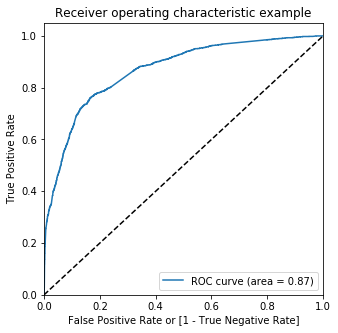

In [85]:
# Defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(Y_train_pred_final['Converted'], Y_train_pred_final['Converted_Prob'])

# Making Prediction on the Test Set

In [86]:
#Scaling Test Data

# Variables to scale
var1=['TotalVisits', 'Time_Spent_On_Website', 'Page_Views_Per_Visit']
X_test[var1]=scaler.transform(X_test[var1])
X_test.head()

,TotalVisits,Time_Spent_On_Website,Page_Views_Per_Visit,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Origin_Quick Add Form,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Others,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Do_Not_Email_Yes,Country_India,Country_Others,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,Current_Occupation_Housewife,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Unknown,Current_Occupation_Working Professional,Free_Copy_Of_Book_Yes
475,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2461,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1890,0.181818,0.075011,0.333333,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
6007,0.272727,0.041722,0.333333,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4052,0.272727,0.066578,0.500000,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [87]:
# ADding constant and making prediction on Test set
X_test=X_test[col]
X_test_sm=sm.add_constant(X_test)


y_test_pred=res2.predict(X_test_sm)

In [88]:
y_pred_1=pd.DataFrame(y_test_pred)

In [89]:
Y_test_df=pd.DataFrame(Y_test)

In [90]:
Y_test_df['Lead_Number']=Y_test_df.index

In [91]:
Y_test_pred_final=pd.concat([Y_test_df,y_pred_1],axis=1)
Y_test_pred_final.rename(columns={0:'Converted_Prob'},inplace=True)
Y_test_pred_final['predicted']=Y_test_pred_final['Converted_Prob'].apply(lambda x: 1 if x>=0.3 else 0)
Y_test_pred_final.head()

,Converted,Lead_Number,Converted_Prob,predicted
475,1,475,0.915686,1
2461,1,2461,0.990647,1
1890,0,1890,0.053448,0
6007,0,6007,0.579388,1
4052,0,4052,0.190103,0


In [92]:
# Test data metrics
confusion2=metrics.confusion_matrix(Y_test_pred_final['Converted'],Y_test_pred_final['predicted'])
print(confusion2)
print('Accuracy',metrics.accuracy_score(Y_test_pred_final['Converted'], Y_test_pred_final['predicted']))


[[1279  312]
 [ 244  769]]
Accuracy 0.7864823348694316


In [93]:
# Exploring other metrics like Sensitivity/ Specificity, TPr/ FPR
TP1=confusion2[1,1]
TN1=confusion2[0,0]
FP1=confusion2[0,1]
FN1=confusion2[1,0]
print('Sensitivity',(TP1/(TP1+FN1)))
print('Specificity',(TN1/(TN1+FP1)))

Sensitivity 0.7591312931885489
Specificity 0.8038969201759899


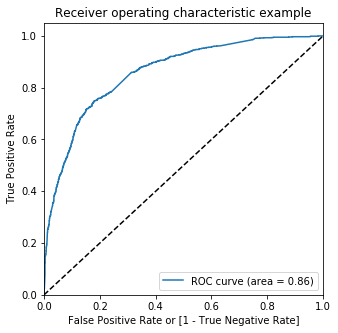

In [94]:
draw_roc(Y_test_pred_final['Converted'], Y_test_pred_final['Converted_Prob'])

['TotalVisits',
 'Time_Spent_On_Website',
 'Lead_Origin_Landing Page Submission',
 'Lead_Origin_Lead Add Form',
 'Lead_Source_Olark Chat',
 'Lead_Source_Welingak Website',
 'Do_Not_Email_Yes',
 'Specialization_Unknown',
 'Current_Occupation_Unknown',
 'Current_Occupation_Working Professional']

## Conclusion
On the Train data At cut off Value: 0.3 we are getting the almost similar values for Accuracy,Sensitivity and Specificity
Accuracy: 0.7845
Sensitivity: 0.7917
Specificity: 0.7800

On the Test data At cut off Value: 0.3 we are getting the below values for Accuracy,Sensitivity and Specificity
Accuracy: 0.7864
Sensitivity: 0.7591
Specificity: 0.8038

List of Final Predictors:
1.'TotalVisits'
2.'Time_Spent_On_Website'
3.'Lead_Origin_Landing Page Submission'
4.'Lead_Origin_Lead Add Form'
5.'Lead_Source_Olark Chat'
6.'Lead_Source_Welingak Website'
7.'Do_Not_Email_Yes'
8.'Specialization_Unknown'
9.'Current_Occupation_Unknown'
10.'Current_Occupation_Working Professional'